# 🦠 COVID-19 ICU 😷

COVID-19 pandemic impacted the whole world, overwhelming healthcare systems - unprepared for such intense and lengthy request for ICU beds, professionals, personal protection equipment and healthcare resources.
Brazil recorded first COVID-19 case on February 26 and reached community transmission on March 20.

Brazil is one of the countries most affected by the COVID-19 pandemic, with more than 16 million confirmed cases and 454 429 confirmed deaths by May 26, 2021 (according to the Johns Hopkins Coronavirus Resource Center). 

Brazil was and still is one of the countries most impacted by the first wave of Covid-19 which first recorded case on 26th February 2020 and reached community transmission from 20th March 2019 onwards to dates, that caught Brazil unprepared and unable to response due to the strain on hospital capacity such as the intense and lengthy request for ICU (incentive care unit) beds, professionals, personal protection equipment and healthcare resources.

This dataset contains anonymized data from Hospital Sírio-Libanês, São Paulo and Brasilia. All data were anonymized following the best international practices and recommendations.
Data has been cleaned and scaled by column according to **MinMaxScaler** to fit between -1 and 1.

## Initial imports
In this section we will set up the libraries that will be used in the notebook and open the data.

In [ ]:
# Used to access the dataset on personal Google Drive
from google.colab import drive

# Used for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Used for visualizing missing data
import missingno as msno

# Used for data preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from collections import Counter

# Used for metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

# Used for models
import xgboost as xgb
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
# Explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Remove notebook warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Change the path to your own path
path = "/content/drive/My Drive/Colab Notebooks/Practice/Datasets/COVID-19/Classification/"

# Load the file - add the file's name
data = pd.read_excel(path+"data.xlsx")

Duplicates could be an issue and cause overfitting. We will have to deal with this issue. Let's first see if the data has any duplicates and remove them.

In [ ]:
print("Data before drop_duplicates:", data.shape)
data = data.drop_duplicates()
print("Data after drop_duplicates:", data.shape)

Data before drop_duplicates: (1925, 231)
Data after drop_duplicates: (1925, 231)


## Exploratory Data Analysis
Exploratory Data Analysis (EDA) will allow us to form and establish hypotheses of predictive insights on the data. This will allow us to correctly prepare the data and develop then develop machine learning models that according to the initially formed hypotheses.

In [ ]:
# Initial data column information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB
None


In [ ]:
# Let's visualize the data columns and see what the data looks like
data.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.4075

In [ ]:
data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

Compared to the **COVID-19 forecasting** dataset, this dataset is contains majority numerical data.

### Missing data
In order for us to develop machine learning models, we have to explore and deal with the missing data. This will allow us to make more accurate models and predictions.

#### Missing data information
Let's check which columns have missing data for all of the data - train, test and submission.

There are 231 columns and it will be difficult to visualize them. Let's further investigate the data.

In [ ]:
# Get every column and the missing values
missing = pd.DataFrame(data=data.columns, columns=['Names'])

missing['Missing Values'] = data.isna().sum().values

missing_columns = missing[missing['Missing Values'] > 0].shape[0]
missing_percentage = round((missing_columns / data.shape[1]) * 100)
print("Columns that have NaN data:\t{} ({}%)" .format(missing_columns, missing_percentage))

Columns that have NaN data:	225 (97%)


#### Missign data exploration
We will use the `missingno` library in order to quickly and easily visualize the missing data and how it is spread within the dataset. We will using `missingno` barplot, heatmap, matrix and dendogram in order for us to inspect any relations between missing data. However visualizing the missing data will be difficult because 97% of the columns have missing data and there are 231 columns.

##### Barplot
A barplot will allow us to see how many values are missing for every column. 

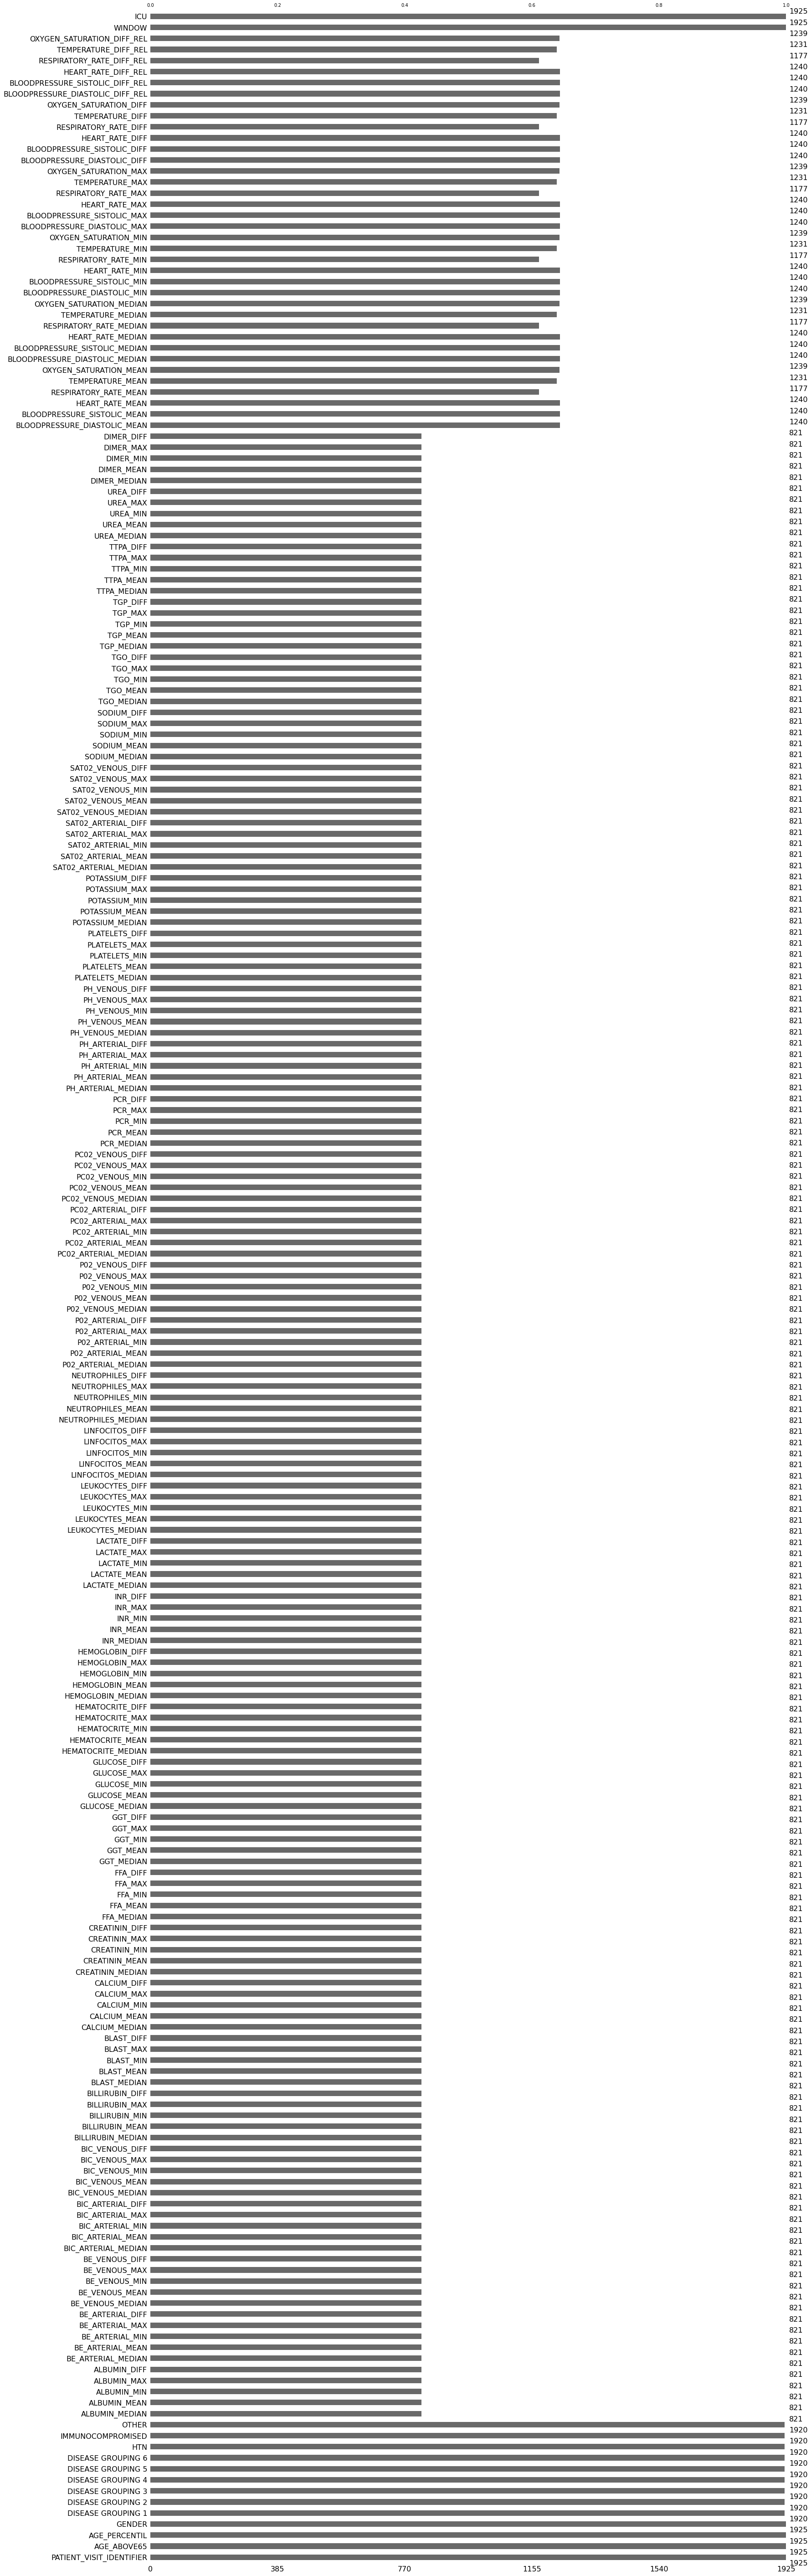

In [ ]:
msno.bar(data)
plt.show()

As mentioned above, 97% of the columns have missing data.

##### Dendogram
A dendogram allows us to see how the missing data is related with each other.

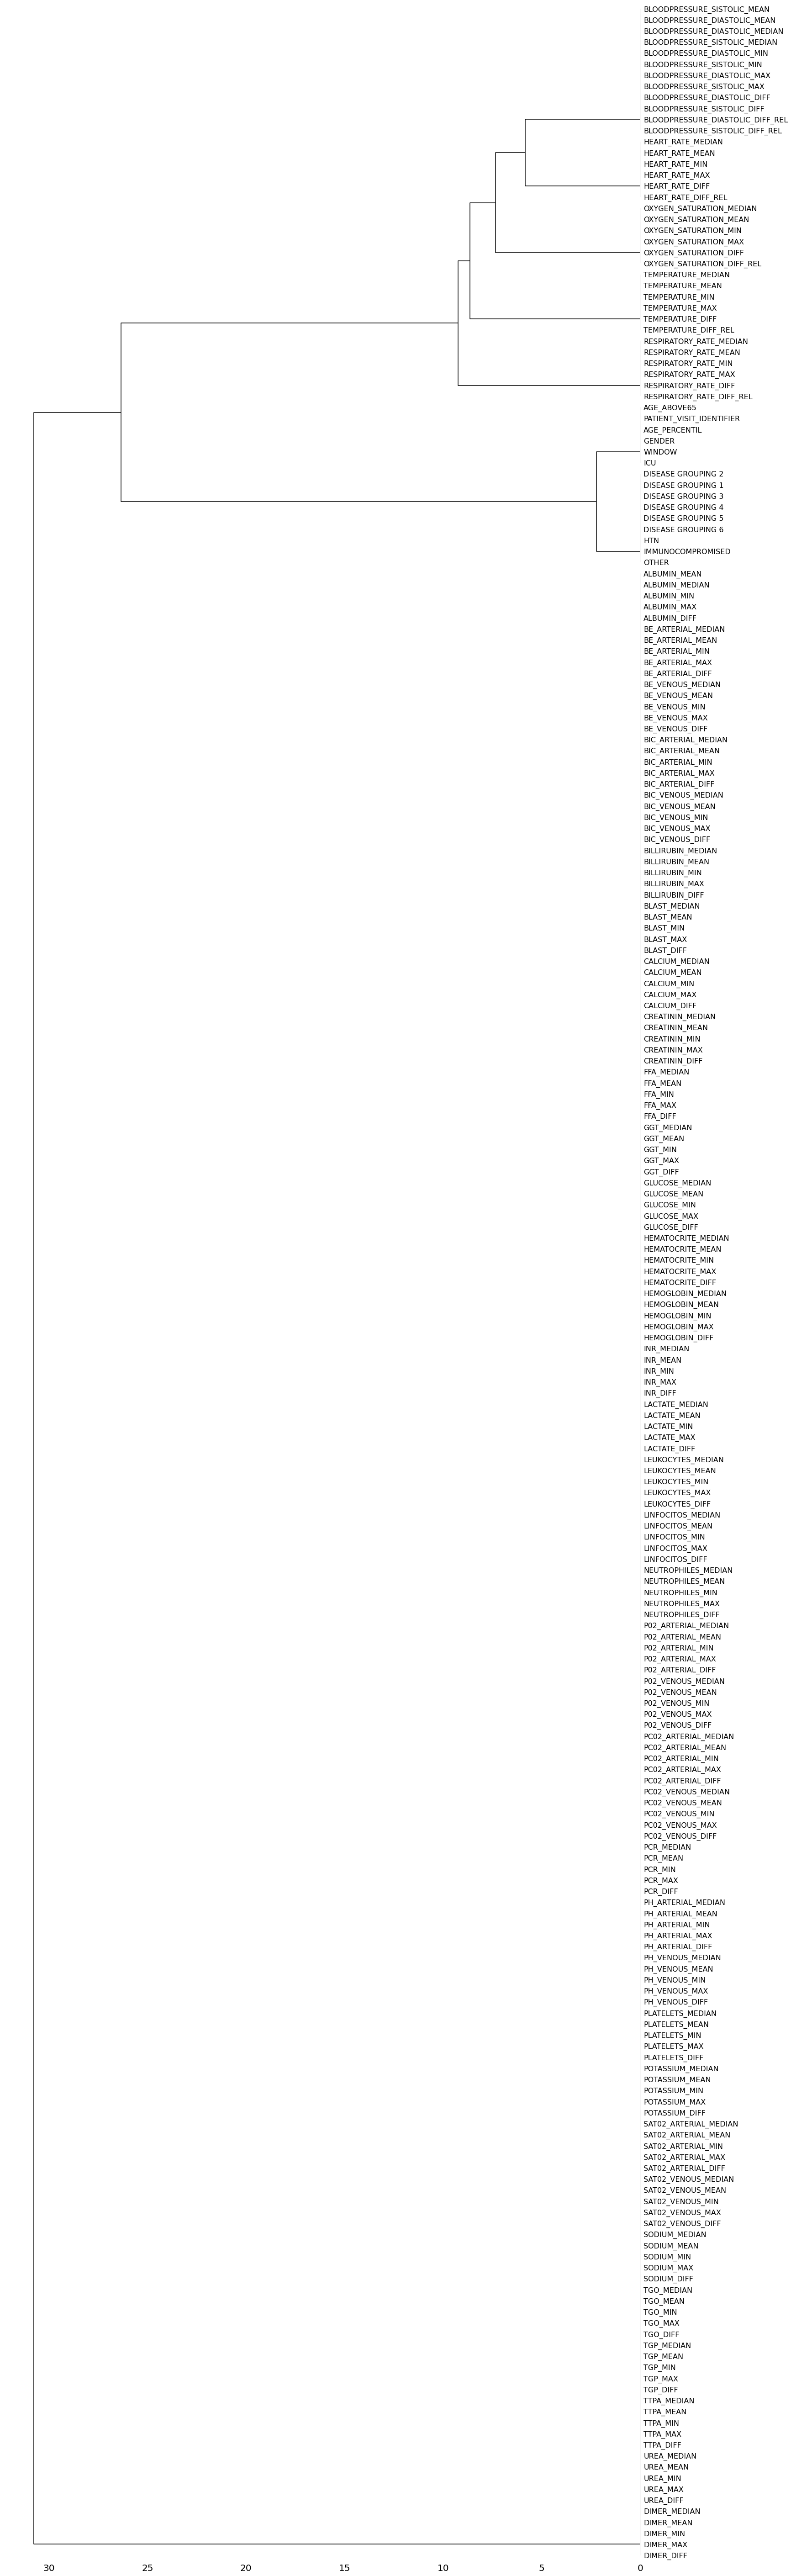

In [ ]:
msno.dendrogram(data)
plt.show()

#### Can we drop the NaN columns rather than imputing them?
There are two ways of dealing with missing data - either dropping all of the **NaN** columns or imputting data. The dataset is quite small and dropping the **NaN** rows could have a huge impact.

In [ ]:
total_rows = data.shape[0]
after_drop_rows = data.dropna().shape[0]
print("Rows before dropna:\t{}\n" .format(total_rows))
print("Rows after dropna:\t{} ({}%)" .format(after_drop_rows, round((after_drop_rows / total_rows) * 100)))

Rows before dropna:	1925

Rows after dropna:	545 (28%)


We will lose 72% of the dataset if we `dropna()` all of the **NaN** columns. We will have to impute the missing data.

#### Dealing with NaN values
In order to deal with **NaN** data, we will look at the **NaN** values on a patient level rather than using `KNNImputer` or `SimpleImputer`. As suggested on the dataset:

*It is reasonable to assume that a patient who does not have a measurement recorded in a time window is clinically stable, potentially presenting vital signs and blood labs similar to neighboring windows.*



In [ ]:
# Forward fill (ffill) the NaN values and then back fill (bfill) the remaining NaN values
def fill_nan(data):
    # Get the patient identifier
    PATIENT_VISIT_IDENTIFIER = data.PATIENT_VISIT_IDENTIFIER
    temp = data.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])\
            .groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)\
            .fillna(method='ffill').fillna(method='bfill')
    # Re-add
    temp.insert(0, 'PATIENT_VISIT_IDENTIFIER', PATIENT_VISIT_IDENTIFIER)
    
    return temp

In [ ]:
data = fill_nan(data)

Now we have dealt with all of the **NaN** data in the dataset and we can move to visualizing the data.

In [ ]:
# Double check if the data has any NaN columns
data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Data Visualization
By visualizing the data we can form hypotheses and get more insight from the data. It also allows us to start thinking about what kind of machine learning algorithms we might need to solve the dataset's problem.


#### **Is the dataset balanced or unbalanced?**
The target value for this dataset is **ICU**. If the target value is 1 then that means that the person has been taken to an **ICU**. If the target value is 0 then the patient has not been taken to an **ICU**.

[]

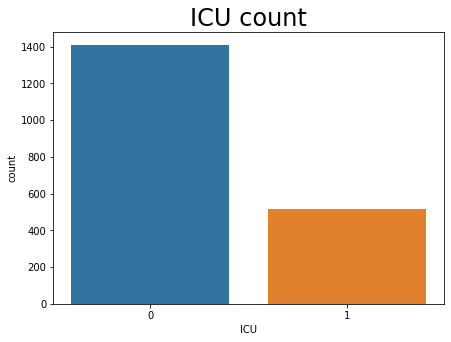

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('ICU count', fontsize=24, loc='center')
sns.countplot(data.ICU)
plt.plot()

The dataset is unbalanced and we will have to either use **SMOTE** or **Weights** on the models, so they can accurately predict if the patient needs an **ICU** or not.

#### **Which AGE_PERCENTIL has the most ICU target values?**
So far we know how that there are way more patients that do not need ICU than the ones they need. To better understand how the **ICU** values are split amongst patients, we will look at the patients age range.

[]

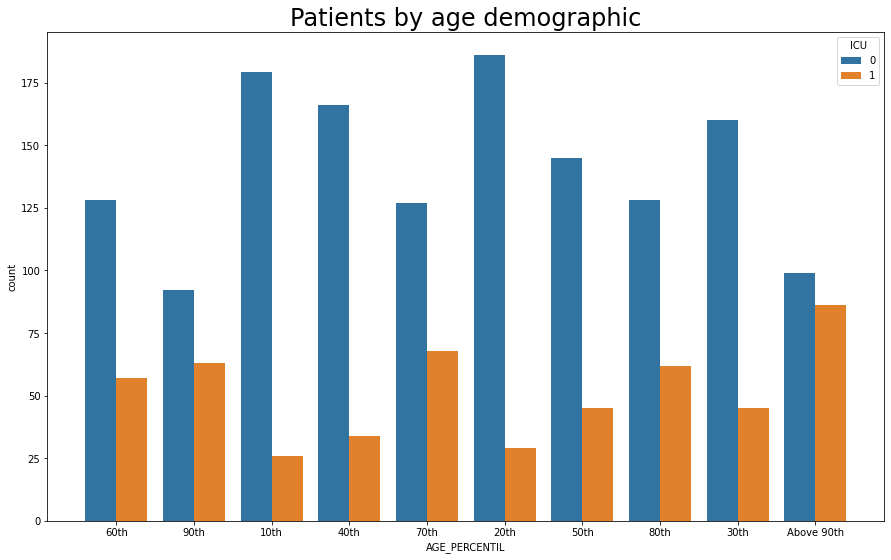

In [ ]:
plt.figure(figsize=(15, 9))
plt.title('Patients by age demographic', fontsize=24, loc='center')
sns.countplot(data.AGE_PERCENTIL, hue='ICU', data=data)
plt.plot()

#### **Does AGE_ABOVE65 matters for ICU target values?**
From the latter question it looks like the younger the patient's demographic is, the less they need an ICU. Let's investigate if it matters if the patient is above 65 or not, to double check if age a person's age matters for an **ICU**.

[]

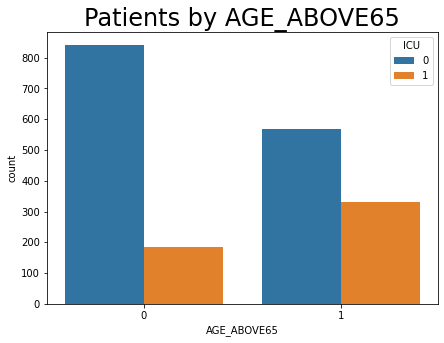

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Patients by AGE_ABOVE65', fontsize=24, loc='center')
sns.countplot(data.AGE_ABOVE65, hue='ICU', data=data)
plt.plot()

The data confirms that the patioent's age plays a key role whether or not the patient needs an ICU.

#### **Which GENDER has the most ICU target values?**
We know how ICU is split based on people's age but we do not know the patients' gender and if a specific gender is more likely to get **ICU**.

[]

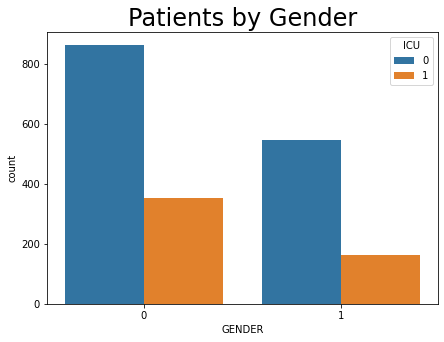

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Patients by Gender', fontsize=24, loc='center')
sns.countplot(data.GENDER, hue='ICU', data=data)
plt.plot()

#### **Is there any relation between diseases and ICU?**
There are columns with diseases that patients have had before the ICU outcome. Although it does not mention the diseases names, patients with prior medical conditions have an increased risk of catching COVID-19.

In [ ]:
# Columns that refer to previous illness for patients
data.columns[3:12]

Index(['GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2',
       'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
       'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED'],
      dtype='object')

In [ ]:
diseases = data[['DISEASE GROUPING 1', 'DISEASE GROUPING 2','DISEASE GROUPING 3',
                    'DISEASE GROUPING 4','DISEASE GROUPING 5', 'DISEASE GROUPING 6',
                    'HTN','IMMUNOCOMPROMISED', 'OTHER', 'ICU']]

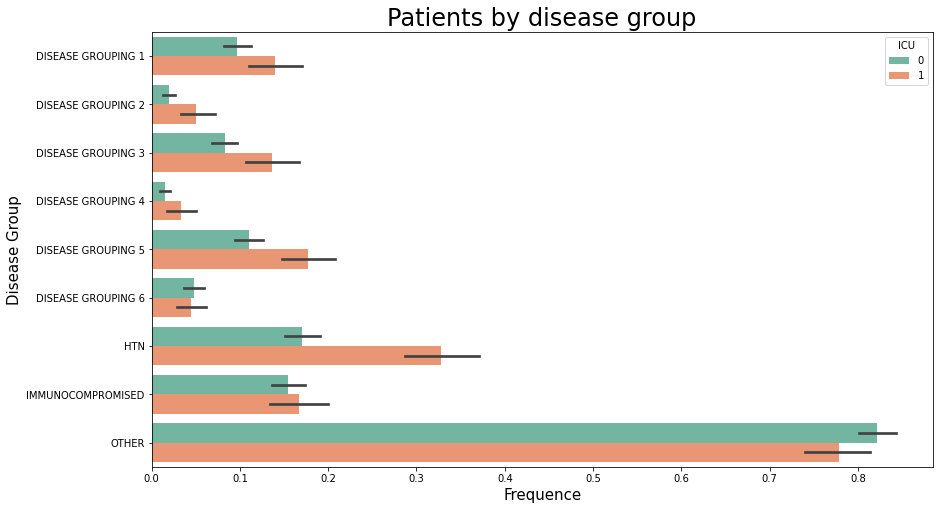

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='value', y='variable', data= diseases.melt(id_vars='ICU'),
            hue='ICU', orient='h', palette= 'Set2')
plt.title('Patients by disease group', fontsize=24, loc='center')
plt.xlabel('Frequence', fontsize=15)
plt.ylabel('Disease Group', fontsize=15);

#### **Which age demographic has the most diseases?**
From the latter question we see that people with a prior health condition have a higher chance of catching COVID-19, hence needing an **ICU**. In addition it also matters if a patient is below or above 65 years old to be assigned an **ICU**. It is worth checking if the **AGE_PERCENTIL** is connected to the diseases they have.

In [ ]:
diseases.insert(0, 'AGE_PERCENTIL', data['AGE_PERCENTIL'])

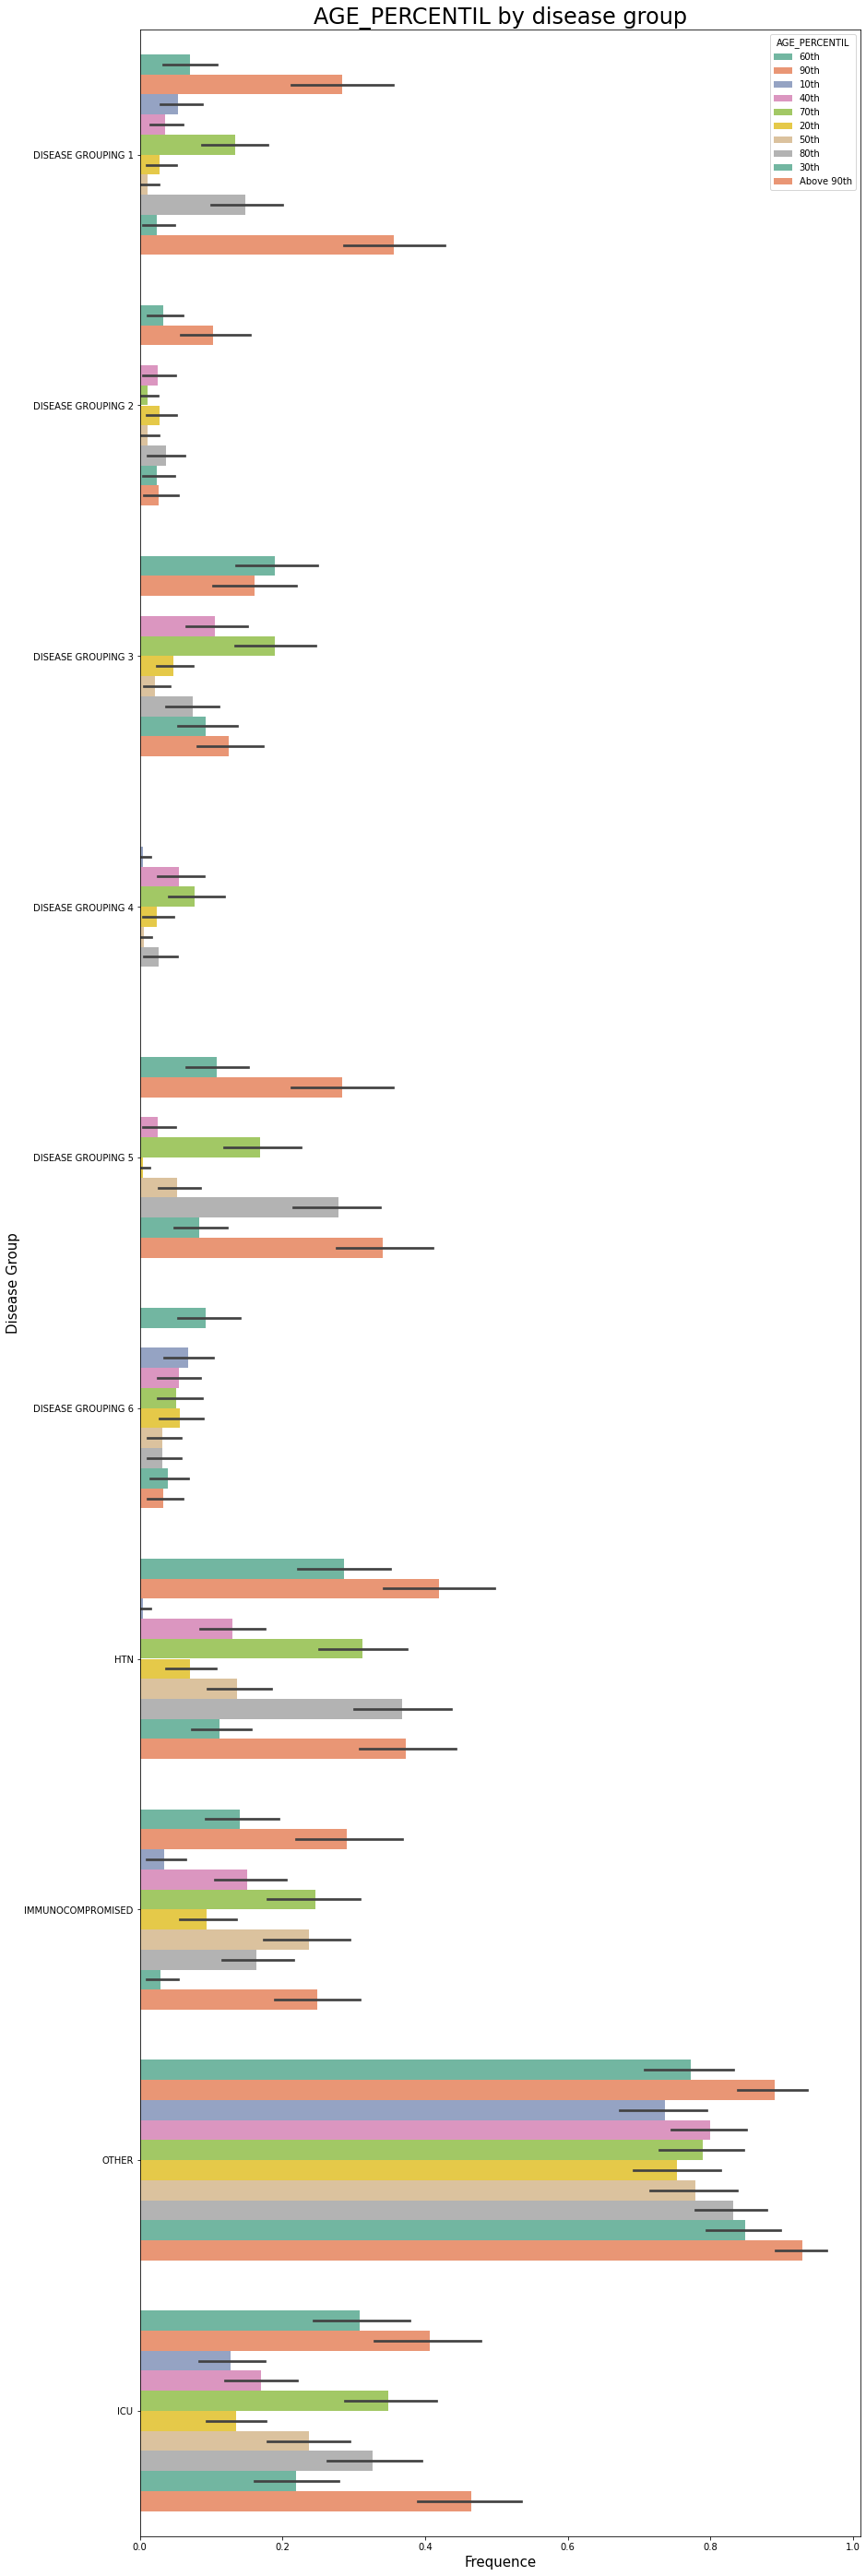

In [ ]:
plt.figure(figsize=(14,50))
sns.barplot(x='value', y='variable', data= diseases.melt(id_vars='AGE_PERCENTIL'),
            hue='AGE_PERCENTIL', orient='h', palette= 'Set2')
plt.title('AGE_PERCENTIL by disease group', fontsize=24, loc='center')
plt.xlabel('Frequence', fontsize=15)
plt.ylabel('Disease Group', fontsize=15);

#### **How many ICU's are there per WINDOW?**
As the authors of the dataset have mentioned we need to be careful when the **ICU** target value is 1, because the lab results could or could not have been ready before the **ICU** admission. We will have to take this into consideration when preparing the data to be given to the models.

In [ ]:
pd.crosstab(data.WINDOW, data.ICU)

ICU,0,1
WINDOW,,
0-2,353,32
2-4,326,59
4-6,286,99
6-12,255,130
ABOVE_12,190,195


## Data Preparation
Before we give the data to the machine learning models, we have to find a way to prepare the data into numbers that can help us predict, in order to make predictions and make them as accurate as possible. 

### Windows
We should be careful when the **ICU** is 1 because the lab results may or may have not been ready before the **ICU** admission. Hence patients with a **WINDOW** 0-2 and **ICU** of 1 will be discarded.

In [ ]:
# Remove unreliable data
data = data.drop(data[(data['WINDOW'] == '0-2') & (data['ICU'] == 1)].index)
pd.crosstab(data.WINDOW, data.ICU)

ICU,0,1
WINDOW,,
0-2,353,0
2-4,326,59
4-6,286,99
6-12,255,130
ABOVE_12,190,195


Now the dataset does not have any invalid cases (`data.ICU == 1 & data.WINDOW == '0-2'`). However because there are not enough records for the model to learn, we will use all of the `WINDOW` variables, rather than only `data.WINDOW == '0-2'`.

### Non-numeric columns
In order for the machine learning algorithms to work with the data we need to convert the `object` columns to numbers.

In [ ]:
print("Non-numeric columns that need to be converted: \n\n{}" .format(data.select_dtypes(object).columns))

Non-numeric columns that need to be converted: 

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')


Let's check the columns values and see how we can encode them.

In [ ]:
for column in data.select_dtypes(object).columns:
  print(column)
  print(data[column].unique())
  print("\n")

AGE_PERCENTIL
['60th' '90th' '10th' '40th' '70th' '20th' '50th' '80th' '30th'
 'Above 90th']


WINDOW
['0-2' '2-4' '4-6' '6-12' 'ABOVE_12']




The labels are categorical and wew ill use `LabelEncoder` to encode the target values.

In [ ]:
le = LabelEncoder()

for column in data.select_dtypes(object).columns:
  data[column] = le.fit_transform(data[column])

In [ ]:
# Double check the dtypes of all of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(6)
memory usage: 3.4 MB


The entire dataset has been converted to numerical values. However the dataset has too many columns and we could possibly have the curse of dimensionality. When having too many features, observations are more likely to appear equidistant from all the others.

### Dimensionality reduction
The dataset has more than 200 features and that can prevent the model from making accurate predictions and capture the essence of the data. In order to provide better predictive scorses, we will use **PCA** before we use **Random Forest** to reduce the dimentions of the dataset.

#### Principal Component Analysis
PCA is used to reduce the dimensions of the dataset so the computational power to run the model is reduced. 

Before we reduce the features of the dataset let's check what would be the ideal number of features. PCA studies the cumulative explained variance ratio of the dataset's features to understand which of them explain the most variance in the data. To begin with, we will start with a Scree Plot of the number of features.

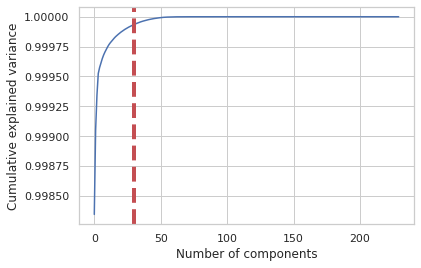

In [ ]:
pca = PCA(n_components=len(data.columns) - 1)
x_data = data.drop(labels=['ICU'], axis=1)

pca.fit(x_data)

# Plot the number of components that will be considered
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=30, ymin=0, ymax=1)
plt.show()

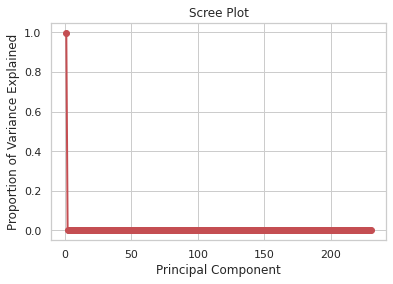

In [ ]:
values = np.arange(pca.n_components_) + 1
plt.plot(values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The Scree Plot does not give us any information so we will use the Cumulative explained variance to see how many features should be left. It looks like 30 features are enough for the dataset to be optimized based on the Cumulative explained variance. Now we can run `PCA` to reduce the number of components.

In [ ]:
pca = PCA(n_components=30)
x_data = data.drop(labels=['ICU'], axis=1)
pca.fit(x_data)

pca_data = pca.transform(x_data)

In [ ]:
pca_columns = []

for x in range (0, pca_data.shape[1]):
  pca_columns.append("PCA Component {}" .format(x))

pca_data = pd.DataFrame(data=pca_data, columns = pca_columns)

In [ ]:
print("Datashape before:\t{}\n" .format(data.shape))
print("Datashape after:\t{}" .format(pca_data.shape))

Datashape before:	(1893, 231)

Datashape after:	(1893, 30)


#### Random Forest
After running **PCA** on the dataset, now we can run `RandomForestClassifier` to check if there are any improvements on the model's predictions. 

In [ ]:
# Split the data into X and Y variables
x = pca_data
y = data['ICU']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model with all of the data
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

Now that the `RandomForestClassifier` model is trained we can visualize the feature importance of the model.

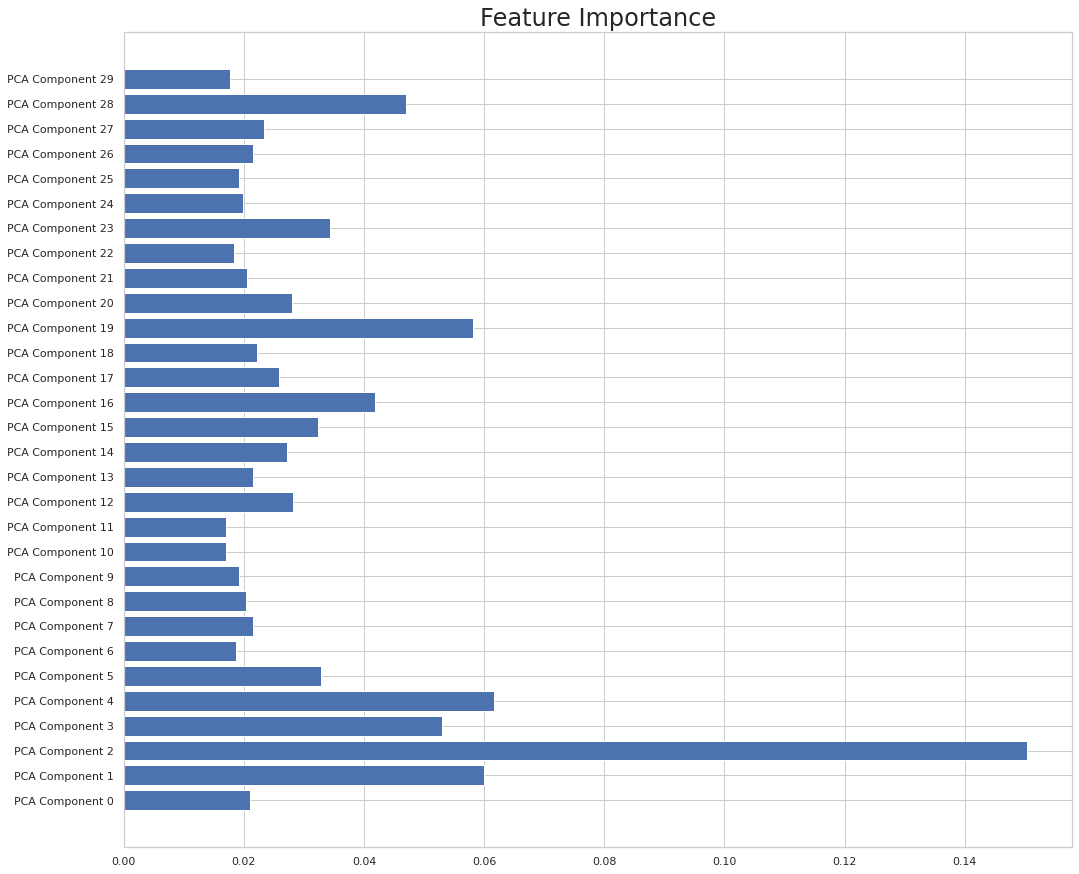

In [ ]:
features = []
values = []

# Get the feature name and the importance
for feature, importance in zip(pca_data.columns, rfc.feature_importances_):
    features.append(feature)
    values.append(importance)

plt.figure(figsize=(17, 15))
plt.title("Feature Importance", fontsize=24)
plt.barh(features, values)
plt.show()

Now that the importance is also visualized, we can select the columns which contribute the most to the final predictions and remove the less contributing columns.

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(x_train, y_train)

columns = sel.get_support()

print("Columns to be removed from: {}\n" .format(pca_data.loc[:, ~columns].columns.values))
print("Columns to be kept: {}" .format(pca_data.loc[:, columns].columns.values))

cleaned_data = pca_data.loc[:, columns]

Columns to be removed from: ['PCA Component 0' 'PCA Component 6' 'PCA Component 7' 'PCA Component 8'
 'PCA Component 9' 'PCA Component 10' 'PCA Component 11'
 'PCA Component 12' 'PCA Component 13' 'PCA Component 14'
 'PCA Component 15' 'PCA Component 17' 'PCA Component 18'
 'PCA Component 20' 'PCA Component 21' 'PCA Component 22'
 'PCA Component 24' 'PCA Component 25' 'PCA Component 26'
 'PCA Component 27' 'PCA Component 29']

Columns to be kept: ['PCA Component 1' 'PCA Component 2' 'PCA Component 3' 'PCA Component 4'
 'PCA Component 5' 'PCA Component 16' 'PCA Component 19'
 'PCA Component 23' 'PCA Component 28']


We have cleaned the data and removed the redundant features. Now we can move on to developing machine learning models. The data will not be scaled - the data has already been scaled for us.